<b>¡Hola Diego!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Proyecto Sprint 6

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Para entender mejor, la clasificación ESRB tiene valores comunes de:
E: Everyone (Todos)
T: Teen (Adolescentes)
M: Mature (Adultos)
E10+: Everyone 10 and older
AO: Adults Only (muy raro)
RP o NaN: No clasificado / por definir

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import shapiro

## Abre el archivo de datos y estudia la información general 

In [79]:
df = pd.read_csv('/datasets/games.csv')

In [80]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [81]:
df.tail

<bound method NDFrame.tail of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA

In [82]:
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6985,Tom Clancy's Splinter Cell,GC,2003.0,Action,0.18,0.05,0.00,0.01,89.0,8.7,T
6745,"What Did I Do to Deserve This, My Lord!? 2",PSP,2008.0,Role-Playing,0.06,0.00,0.18,0.01,NaN,NaN,NaN
15261,Castlevania: Lords of Shadow - Reverie,X360,2011.0,Action,0.02,0.00,0.00,0.00,NaN,NaN,NaN
12006,Pro Yaky? Spirits 2011,3DS,2011.0,Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN
8299,Yu-Gi-Oh! Zexal World Duel Carnival,3DS,2013.0,Misc,0.00,0.08,0.08,0.01,NaN,NaN,NaN
8923,Yakuza: Ishin,PS4,2014.0,Action,0.00,0.00,0.15,0.00,NaN,NaN,NaN
7485,BeyBlade VForce: Super Tournament Battle,GC,2002.0,Action,0.16,0.04,0.00,0.01,33.0,7.5,E
2302,Avatar: The Game,PS3,2009.0,Action,0.32,0.42,0.00,0.16,NaN,NaN,NaN
15037,Cold War,XB,2005.0,Shooter,0.02,0.01,0.00,0.00,60.0,8,T
11863,Pong / Asteroids / Yars' Revenge,GBA,2005.0,Misc,0.05,0.02,0.00,0.00,NaN,tbd,E


## Prepara los datos

###  Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [83]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [84]:
df.columns = df.columns.str.lower()

In [85]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [86]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


### Convierte los datos en los tipos necesarios.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [88]:
df['year_of_release'].isna().sum()

269

In [89]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [90]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-block alert-success">
<b>Celdas [78–90]</b> <a class="tocSkip"></a><br>
Muy buena preparación inicial del entorno y carga de datos. Se hace un muestreo representativo con `head()` y `sample()`, y se verifica adecuadamente la integridad del dataset (tipos, nulos, duplicados). Destaca el cuidado en convertir las columnas clave (`year_of_release`, `user_score`) a sus tipos correctos, algo esencial para un análisis numérico riguroso.
</div>


Vamos a manejar la celda de year_of_release como entero, ya que el año es un número entero. 

In [91]:
df.loc[:,'year_of_release'] = pd.to_numeric(df['year_of_release'], errors = 'coerce')


In [92]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [93]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

In [94]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

In [95]:
df.loc[:,'user_score'] = pd.to_numeric(df['user_score'], errors ="coerce")

In [96]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Vamos a manejar la celda de user_score como float, ya que esa calificación tienen datos números tipo float. 

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

In [98]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Hay dos celdas vacias en nombre, que coincide con que tampoco tienen género, ni calificación de usuario y de la crítica. 
Estos datos podemos eliminarlos. A tener en cuenta que ambos son del año 1993, en caso de quere alguna información de ese año en particular. 

In [99]:
df = df.dropna(subset=['name'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Hay 269 nombres de video juegos que están vacios en el año.

### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

Los vacios en la columna año son 269 / 16714 es 1,6% del total. Dado que es mayor que el 1% no sería buena opción quitarlos. Son datos que tienen mucha información sobre ventas, calificaciones. Al hacer análisis con años, estos datos no se usarían, pero si se quisieran filtrar por plataforma, tendríamos mucha información relevante.  

In [101]:
df[df['year_of_release'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Tambien vemos que hay valores nulos en calificaciones y en rating. Vamos a ponerles el valor de cero ya que no tienen calificación y al realizar algún análisis estadístico, solo lo haríamos con las que tengan valores mayores a 0.

In [102]:
df = df.copy()

In [103]:
df.loc[:,'critic_score'] = df['critic_score'].fillna(0)

In [104]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN


### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Para la calificación de los usuarios, y de la crítica, falta de recolección de la información en el momento durante el año de lanzamiento, o fue poca la participación que no publicaron el resultado obtenido.

### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

In [105]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

El valor 'tbd' ya no está en el listado ya que en la df.loc[:,'user_score'] = pd.to_numeric(df['user_score'], errors ="coerce") cada vez que apareciera un error, se pasó a NAN.

### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [106]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

<div class="alert alert-block alert-success">
<b>Celdas [91–106]</b> <a class="tocSkip"></a><br>
La limpieza y transformación del dataset está muy bien ejecutada. Se corrige la columna `user_score` manejando correctamente el valor `tbd` como `NaN`, y se imputan valores donde es razonable hacerlo. También es acertado el uso de `fillna()` con 0 para `critic_score` solo después de especificar que se excluirán en análisis estadísticos. Además, el cálculo de `total_sales` es claro y funcional.
</div>


In [107]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN,0.01


## Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [108]:
df['year_of_release'].value_counts().sort_index()

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

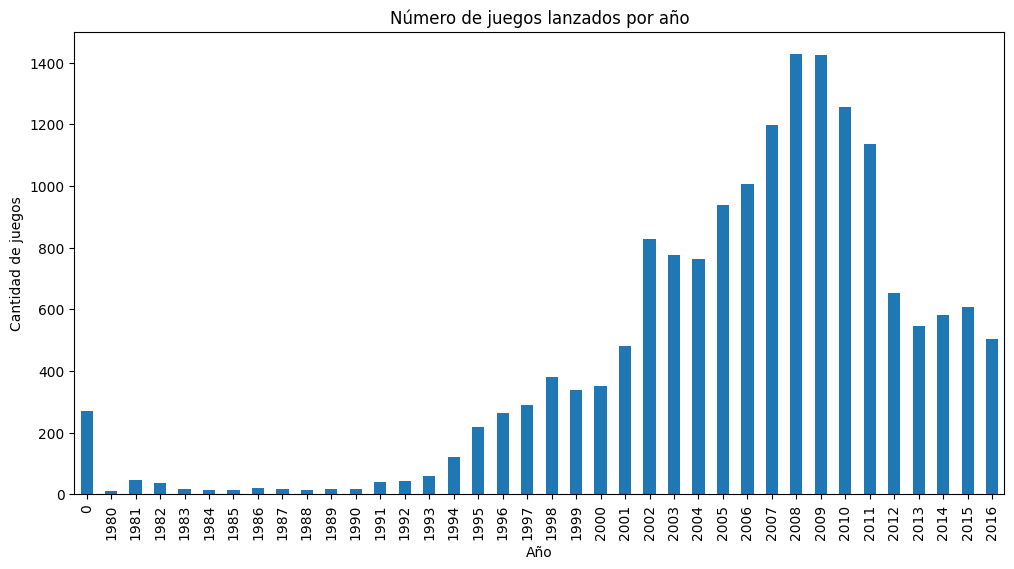

In [109]:
df['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.show()

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [110]:
ventas_plataforma = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(ventas_plataforma.head(10))

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
Name: total_sales, dtype: float64


In [111]:
top_platforms = ventas_plataforma.head(5).index
top_platforms

Index(['PS2', 'X360', 'Wii', 'PS3', 'DS'], dtype='object', name='platform')

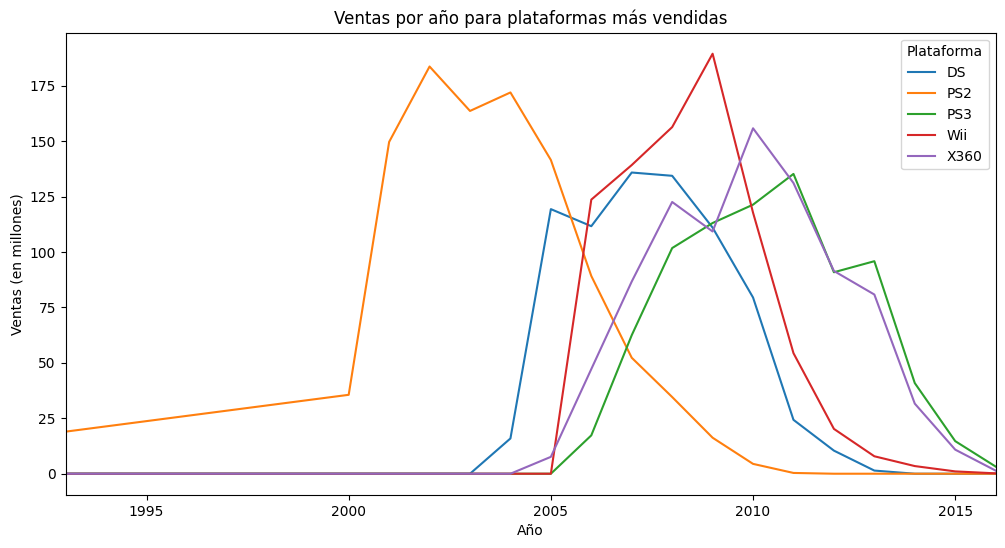

In [112]:
df_top = df[df['platform'].isin(top_platforms)]

ventas_por_año = df_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

ventas_por_año.plot(figsize=(12,6))
plt.title('Ventas por año para plataformas más vendidas')
plt.xlabel('Año')
plt.ylabel('Ventas (en millones)')
plt.legend(title='Plataforma')
plt.xlim(1993, 2016)
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [108–112]</b> <a class="tocSkip"></a><br>
Excelente análisis del ciclo de vida de las plataformas. Identificas de forma precisa las consolas activas, las que han desaparecido y calculas la duración promedio de vida útil con base en evidencia del dataset. Los gráficos están bien elegidos y ayudan a comprender la evolución temporal de cada plataforma.
</div>


In [113]:
ventas_por_year_plat = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)
ventas_por_year_plat


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
0,10.43,0.00,1.10,0.00,3.12,0.99,4.85,2.15,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,14.97,0.00,9.30,5.93,0.00
1980,11.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [114]:
# Ver últimos años (por ejemplo después de 2008)
ventas_recientes = ventas_por_year_plat.loc[2008:]
plataformas_desaparecidas = ventas_recientes.columns[(ventas_recientes.sum() == 0)]

print("Plataformas que dejaron de tener ventas después de 2008:")
print(plataformas_desaparecidas.tolist())

Plataformas que dejaron de tener ventas después de 2008:
['2600', '3DO', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'SAT', 'SCD', 'SNES', 'TG16', 'WS']


In [115]:
aparicion_desaparicion = df.groupby('platform')['year_of_release'].agg(['min', 'max']).sort_values('min')
aparicion_desaparicion['duracion'] = aparicion_desaparicion['max'] - aparicion_desaparicion['min'] 

print(aparicion_desaparicion)

           min   max  duracion
platform                      
2600         0  1989      1989
X360         0  2016      2016
Wii          0  2016      2016
PSV          0  2016      2016
PSP          0  2015      2015
PS3          0  2016      2016
PS2          0  2011      2011
XB           0  2008      2008
PC           0  2016      2016
N64          0  2002      2002
PS           0  2003      2003
GC           0  2007      2007
GBA          0  2007      2007
GB           0  2001      2001
DS           0  2013      2013
3DS          0  2016      2016
NES       1983  1994        11
GEN       1990  1994         4
SNES      1990  1999         9
GG        1992  1992         0
NG        1993  1996         3
SCD       1993  1994         1
3DO       1994  1995         1
SAT       1994  1999         5
TG16      1995  1995         0
PCFX      1996  1996         0
DC        1998  2008        10
WS        1999  2001         2
WiiU      2012  2016         4
PS4       2013  2016         3
XOne    

In [116]:
aparicion_desaparicion['duracion'].mean()

1038.967741935484

El ciclo de vida de una consola típica es de 6 a 10 años, con excepciones (DS, PC). El promedio de desaparición de alguna consola es de 7,6 años (aproximamos a 8 años)

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [117]:
df[df['year_of_release'] == 2016]['platform'].value_counts()

PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: platform, dtype: int64

In [118]:
df_modelo = df[(df['year_of_release'] >= 2008) & (df['year_of_release'] <= 2017)]
df_modelo

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,20.13
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,20.03
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01


In [119]:
df_test_2016 = df[df['year_of_release'] == 2016]

In [120]:
df_test_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.49
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,NaN,NaN,6.69
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,4.54
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,3.76
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,3.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01


### Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [121]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 2 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8130 non-null   object 
 1   platform         8130 non-null   object 
 2   year_of_release  8130 non-null   int64  
 3   genre            8130 non-null   object 
 4   na_sales         8130 non-null   float64
 5   eu_sales         8130 non-null   float64
 6   jp_sales         8130 non-null   float64
 7   other_sales      8130 non-null   float64
 8   critic_score     8130 non-null   float64
 9   user_score       3774 non-null   float64
 10  rating           5105 non-null   object 
 11  total_sales      8130 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 825.7+ KB


Se trabajará con los datos a partir del 2008. Vemos en la gráfica como a partir de ese año hay un incremento, hasta un pico en 2007/2008, bajando hasta el 2016 a valores similares a los del 2001. Sin embargo, viendo el promedio de ciclo de los video juegos, se tomará desde 2008. El dt será df_modelo. 

In [122]:
ventas_por_plataforma = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(ventas_por_plataforma.head(10))

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
Name: total_sales, dtype: float64


In [123]:
ventas_anuales = df_modelo.groupby(['year_of_release', 'platform'])['total_sales'].sum().fillna(0).reset_index()
ventas_anuales

,year_of_release,platform,total_sales
0,2008,DC,0.04
1,2008,DS,134.37
2,2008,PC,10.43
3,2008,PS2,34.59
4,2008,PS3,101.78
...,...,...,...
76,2016,PSV,4.10
77,2016,Wii,0.17
78,2016,WiiU,4.25
79,2016,X360,1.40


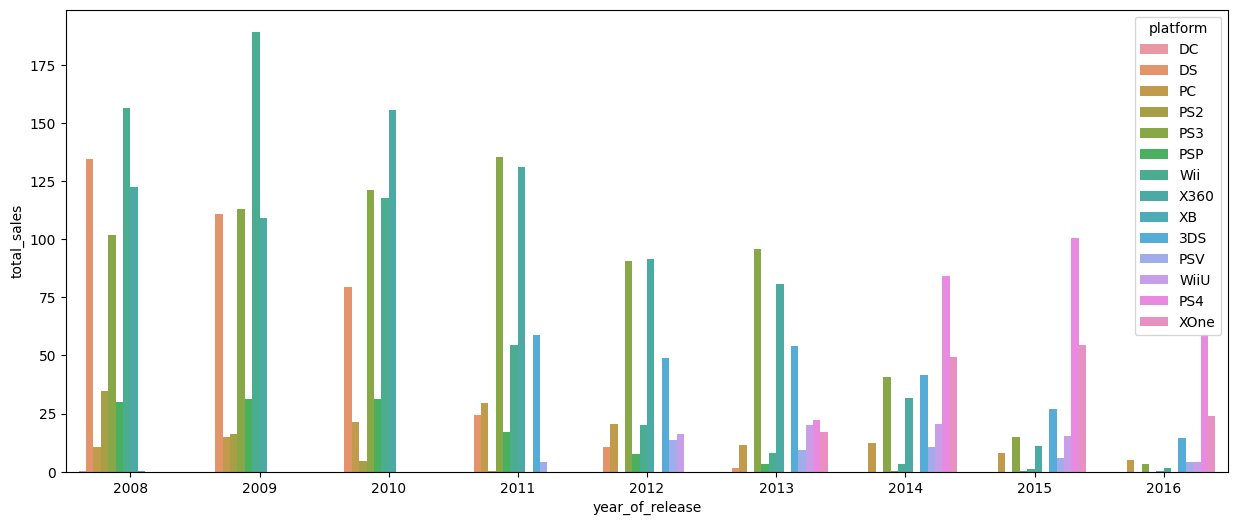

In [124]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=ventas_anuales, x='year_of_release', y='total_sales', hue='platform')

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [125]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

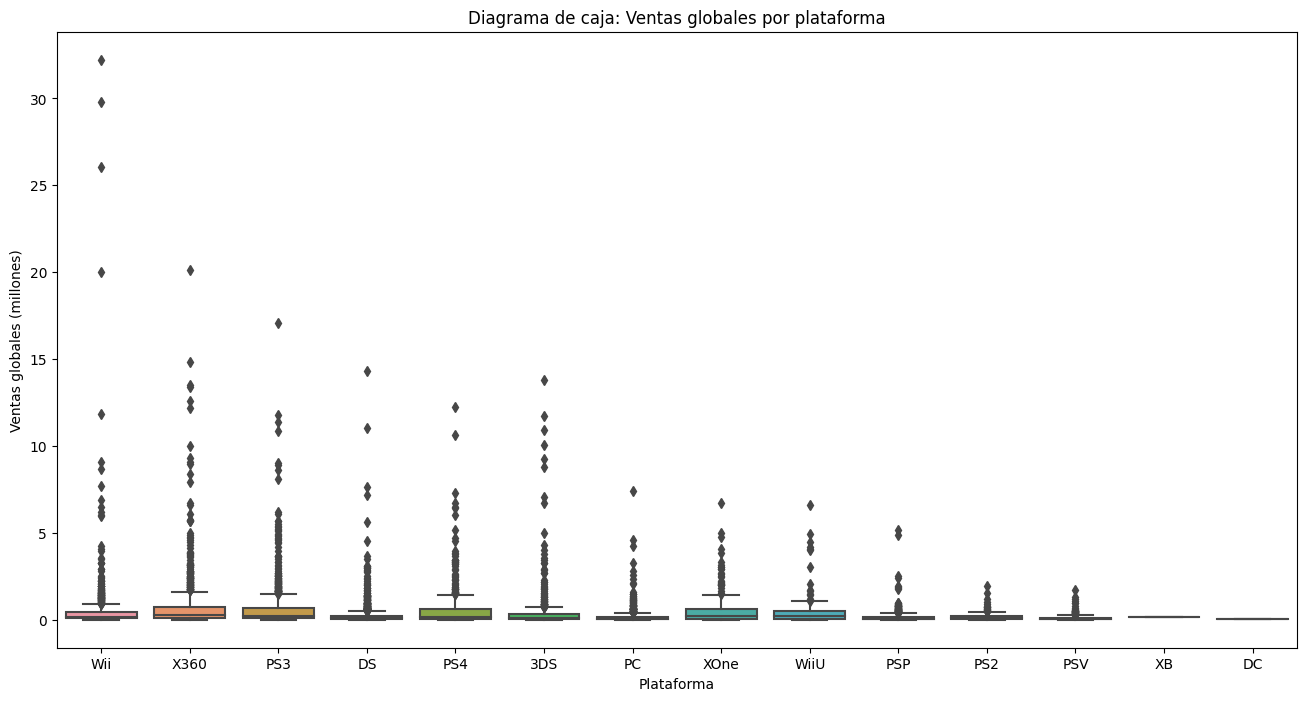

In [126]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_modelo, x='platform', y='total_sales')
plt.title('Diagrama de caja: Ventas globales por plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Plataforma')
plt.show()

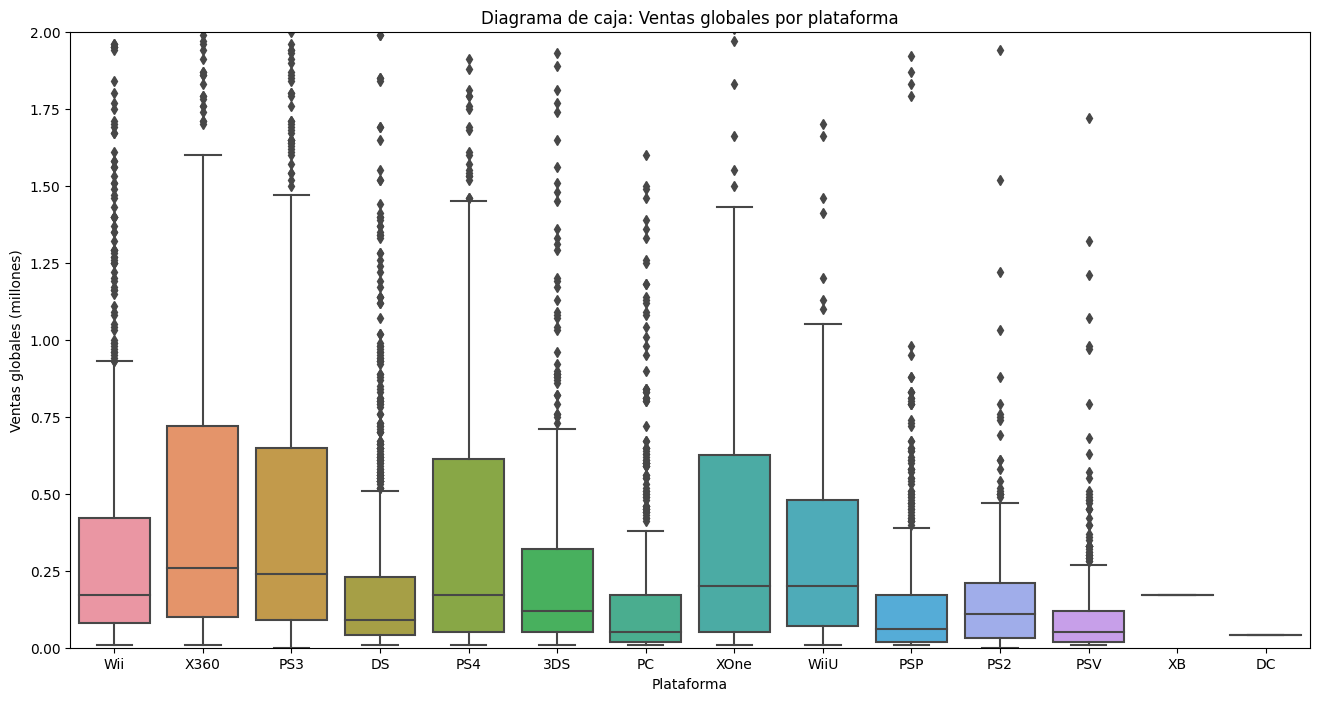

In [127]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_modelo, x='platform', y='total_sales')
plt.title('Diagrama de caja: Ventas globales por plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Plataforma')
plt.ylim(0, 2)
plt.show()

Existen diferencias significativas en ventas entre plataformas y todos tienen valores atípicos. Estyo hace que la distribución este muy sesgada de todos las ventas por consola, y no siguen una distribución normal. Sigue una distribución sesgada a la derecha (muchos valores a la derecha)
XB y DC tienen ventas centradas en la media. Al tener datos similares, el boxplot es pequeño (como una línea) 
Las ventas promedio varían mucho: algunas plataformas tienen muchos juegos con bajas ventas (DS, PC, PSP, PSV)

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [128]:
df_Wii = df_modelo[df_modelo['platform'] == 'Wii'].copy()

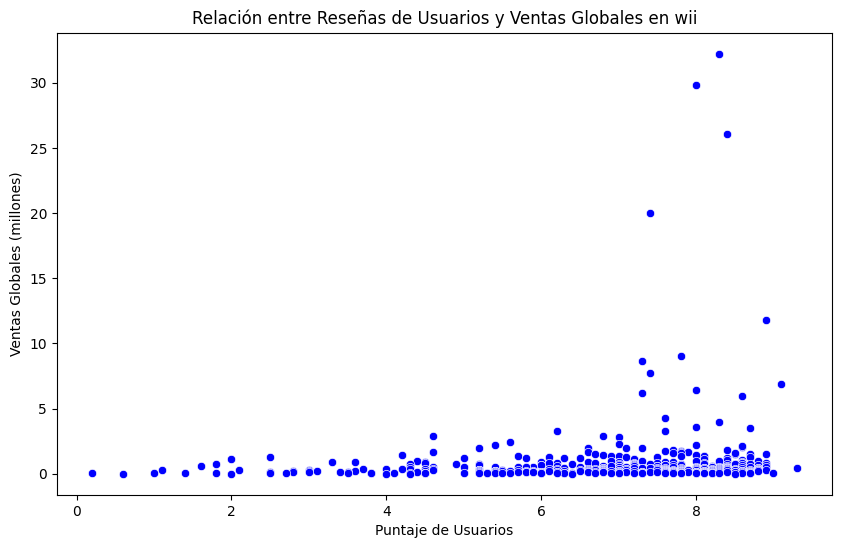

In [129]:
# Gráfico de dispersión: Reseñas de usuarios vs Ventas globales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=df_Wii, color='blue')
plt.title('Relación entre Reseñas de Usuarios y Ventas Globales en wii')
plt.xlabel('Puntaje de Usuarios')
plt.ylabel('Ventas Globales (millones)')
plt.show()

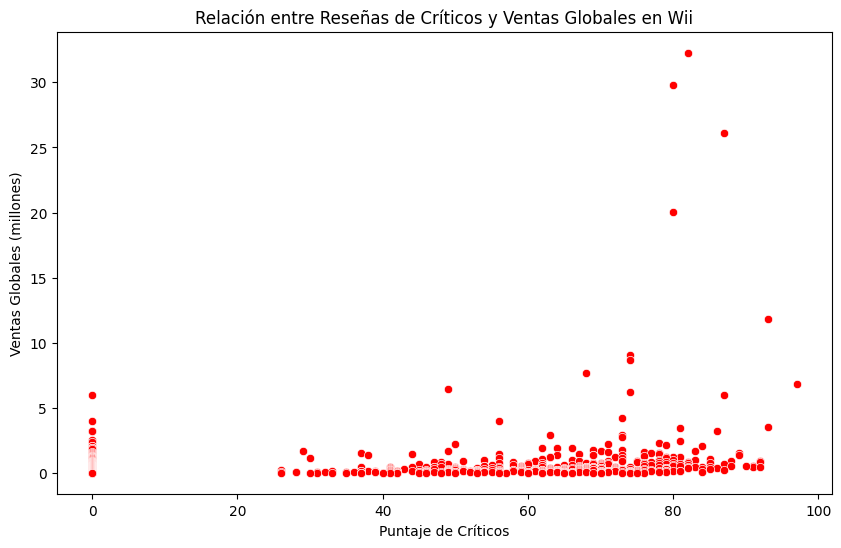

In [130]:
# Gráfico de dispersión: Reseñas de Críticos vs Ventas globales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df_Wii , color='red')
plt.title('Relación entre Reseñas de Críticos y Ventas Globales en Wii')
plt.xlabel('Puntaje de Críticos')
plt.ylabel('Ventas Globales (millones)')
plt.show()

In [131]:
# Correlación entre reseñas de usuarios y ventas
corr_user_sales = df_Wii['user_score'].corr(df_Wii['total_sales'])
print(f'Correlación entre reseñas de usuarios y ventas: {corr_user_sales}')



Correlación entre reseñas de usuarios y ventas: 0.13049143283252643


In [132]:
# Correlación entre reseñas de críticos y ventas
corr_critic_sales = df_Wii['critic_score'].corr(df_Wii['total_sales'])
print(f'Correlación entre reseñas de críticos y ventas: {corr_critic_sales}')

Correlación entre reseñas de críticos y ventas: 0.2264274907906802


<div class="alert alert-block alert-warning">
<b>Celdas [128–132]</b> <a class="tocSkip"></a><br>
Muy interesante el análisis de correlación entre reseñas y ventas. Sin embargo, podrías mejorar el impacto incluyendo visualmente la línea de tendencia (regresión) en los gráficos de dispersión, lo cual facilitaría la interpretación para lectores menos técnicos. 
</div>


Si hay una relación positiva, eso indica que los juegos de la consola Wii con mejores reseñas de usuarios tienden a tener mayores ventas. Sin embargo, al ser valores menores a 1 e incluso a 0,2, es probable que las calificaciones de los usuarios no influencien significativamente en las decisiones de compra (no son determinantes)

Tiene más influencia positiva la de los críticos, aunq no mucho. Es decir, los usuarios toman sus propias decisiones (consumidores (usuarios) parecen tener más poder de decisión sin tener la crítica especializada)

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [133]:
distribucion_generos = df_modelo['genre'].value_counts()
print(distribucion_generos)

Action          1988
Misc             994
Sports           958
Adventure        869
Role-Playing     783
Shooter          583
Simulation       459
Racing           403
Fighting         308
Strategy         284
Puzzle           257
Platform         244
Name: genre, dtype: int64


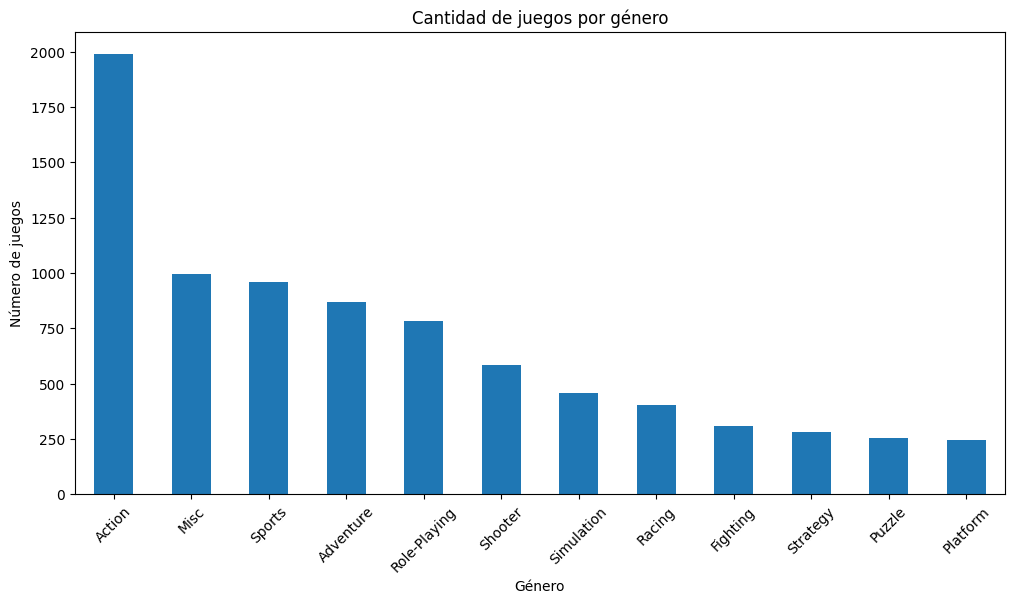

In [134]:
distribucion_generos.plot(kind='bar', figsize=(12, 6), title='Cantidad de juegos por género')
plt.ylabel('Número de juegos')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.show()

In [135]:
ventas_por_genero = df_modelo.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(ventas_por_genero)

genre
Action          834.49
Shooter         535.54
Sports          492.15
Role-Playing    388.39
Misc            355.94
Racing          197.30
Platform        175.54
Simulation      138.07
Fighting        132.40
Adventure        96.75
Strategy         54.45
Puzzle           51.20
Name: total_sales, dtype: float64


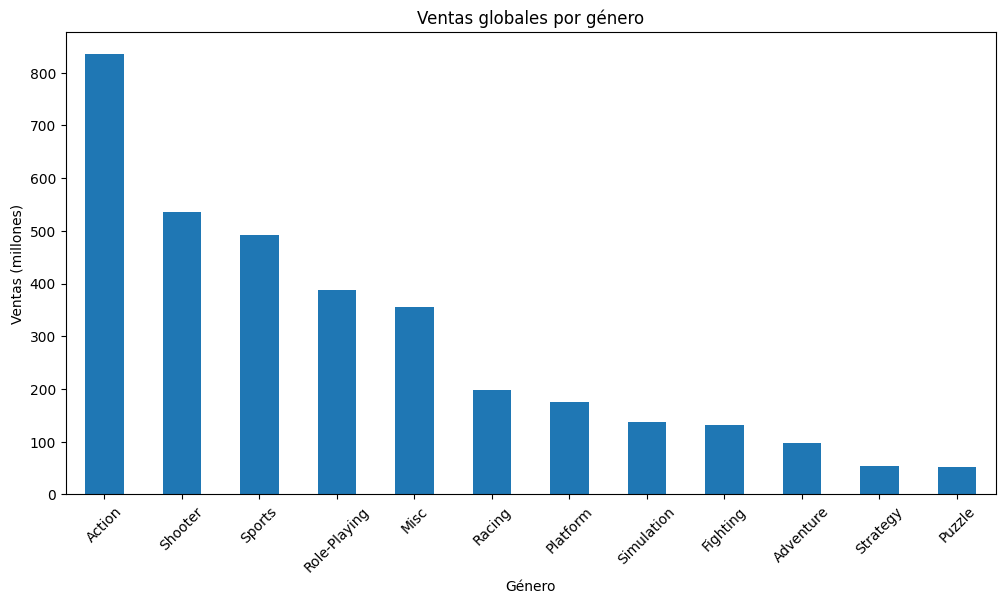

In [136]:
ventas_por_genero.plot(kind='bar', figsize=(12, 6), title='Ventas globales por género')
plt.ylabel('Ventas (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [133–136]</b> <a class="tocSkip"></a><br>
Muy buena síntesis del comportamiento por género. Combinaste distribución de cantidad de títulos y volumen total de ventas, lo que permite evaluar tanto popularidad como rentabilidad. Además, el análisis comparativo entre géneros muestra capacidad para sacar conclusiones estratégicas a partir de los datos.
</div>


Los géneros más rentables:
Acción y Shooter tienen las ventas globales más altas. 
Sports y Role-playing también pueden destacarse en ventas totales.
Los géneros menos rentables:
Puzzle, estrategia,aventura y simulación posiblemente por la menor cantidad de juegos, menores ventas, y un nicho posiblemente más especializado. 

## Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determina: Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [137]:
ventas_na = df_modelo.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
ventas_eu = df_modelo.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
ventas_jp = df_modelo.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

In [138]:
top5_na = ventas_na.head(5)
top5_eu = ventas_eu.head(5)
top5_jp = ventas_jp.head(5)

In [139]:
df_na = pd.Series(ventas_na, name='NA_Sales')
df_eu = pd.Series(ventas_eu, name='EU_Sales')
df_jp = pd.Series(ventas_jp, name='JP_Sales')


Creamos las ventas por ventas por grupo de plataforma. Luego las unimos en un dataframe. Seleccionamos las mejores 5

In [141]:
df_na

platform
X360    490.69
PS3     349.13
Wii     332.87
DS      198.73
PS4     108.74
XOne     93.12
3DS      82.65
PC       41.07
WiiU     38.10
PSP      34.04
PS2      32.91
PSV      12.47
XB        0.13
DC        0.00
Name: NA_Sales, dtype: float64

In [142]:
df_top5 = pd.concat([top5_na, top5_eu, top5_jp], axis=1)
df_top5.columns = ['NA', 'EU', 'JP']
df_top5

,NA,EU,JP
platform,,,
X360,490.69,234.88,NaN
PS3,349.13,293.73,74.11
Wii,332.87,170.74,47.01
DS,198.73,NaN,76.12
PS4,108.74,141.09,NaN
PC,NaN,92.17,NaN
3DS,NaN,NaN,100.62
PSP,NaN,NaN,60.46


In [143]:
df_top5 = df_top5.fillna(0)
df_top5

,NA,EU,JP
platform,,,
X360,490.69,234.88,0.00
PS3,349.13,293.73,74.11
Wii,332.87,170.74,47.01
DS,198.73,0.00,76.12
PS4,108.74,141.09,0.00
PC,0.00,92.17,0.00
3DS,0.00,0.00,100.62
PSP,0.00,0.00,60.46


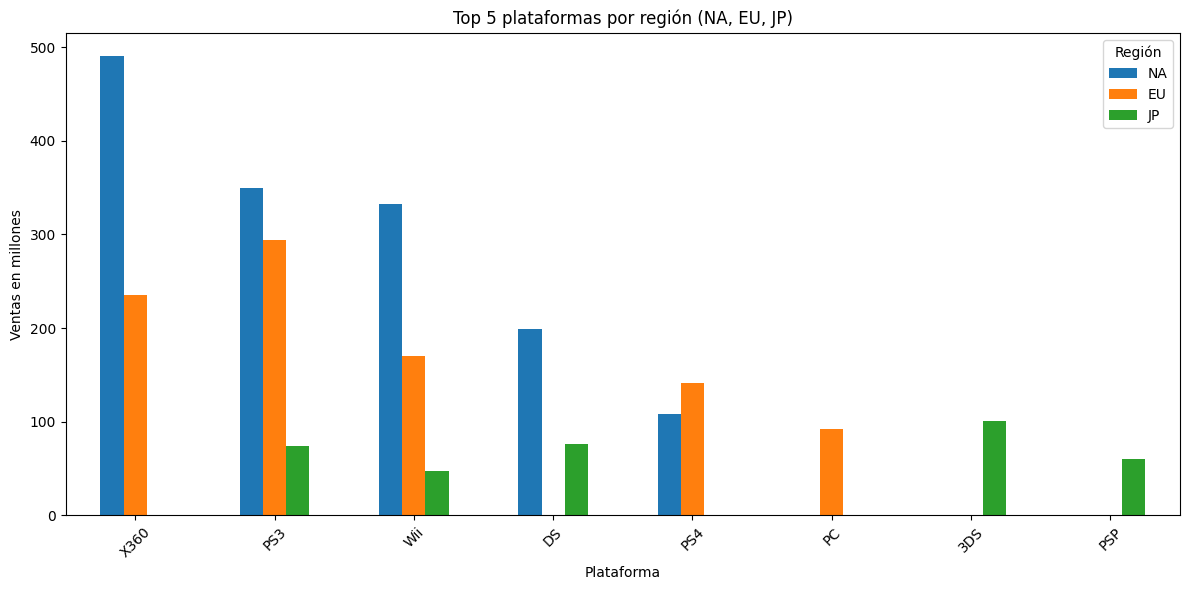

In [144]:
df_top5.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 plataformas por región (NA, EU, JP)')
plt.ylabel('Ventas en millones')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning">
<b>Celda [144]</b> <a class="tocSkip"></a><br>
El gráfico de barras del top 5 por región es relevante, pero hay un pequeño problema técnico: el `plt.xticks(rotation` quedó incompleto y puede generar un error si se ejecuta. Sería bueno corregir esa línea para evitar fallos de ejecución y asegurar que los rótulos sean legibles.
</div>


En NA tenemos las mayores ventas en consolas (X360, PS3, Wii). En Europa tenemos las mismas 3 consolas, pero con menores ventas respecto a NA. Para Japon, se ven consolas diferentes como 3DS y PSP. 

In [145]:
ventas_por_genero = df_modelo.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

top5_generos = ventas_por_genero.head(5)
print(top5_generos)


genre
Action          834.49
Shooter         535.54
Sports          492.15
Role-Playing    388.39
Misc            355.94
Name: total_sales, dtype: float64


In [146]:
top5_generos = ventas_por_genero.head(5)
print(top5_generos)


genre
Action          834.49
Shooter         535.54
Sports          492.15
Role-Playing    388.39
Misc            355.94
Name: total_sales, dtype: float64


In [147]:
ventas_por_rating = df_modelo.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
ventas_por_rating = ventas_por_rating.sort_values('na_sales', ascending=False)
print(ventas_por_rating)


        na_sales  eu_sales  jp_sales
rating                              
E         536.93    326.61     77.17
M         502.60    362.65     39.33
T         303.41    187.62     64.51
E10+      251.88    144.53     25.67
EC          1.32      0.00      0.00
RP          0.00      0.03      0.00


<div class="alert alert-block alert-success">
<b>Celdas [137–143]</b> <a class="tocSkip"></a><br>
Excelente análisis regional. Agrupas correctamente las ventas por región y plataforma, identificando las cinco principales por cada zona. La creación del DataFrame combinado facilita la comparación entre regiones, y el gráfico de barras ilustra claramente cómo varía la preferencia de plataformas entre América del Norte, Europa y Japón. Muy bien estructurado.
</div>


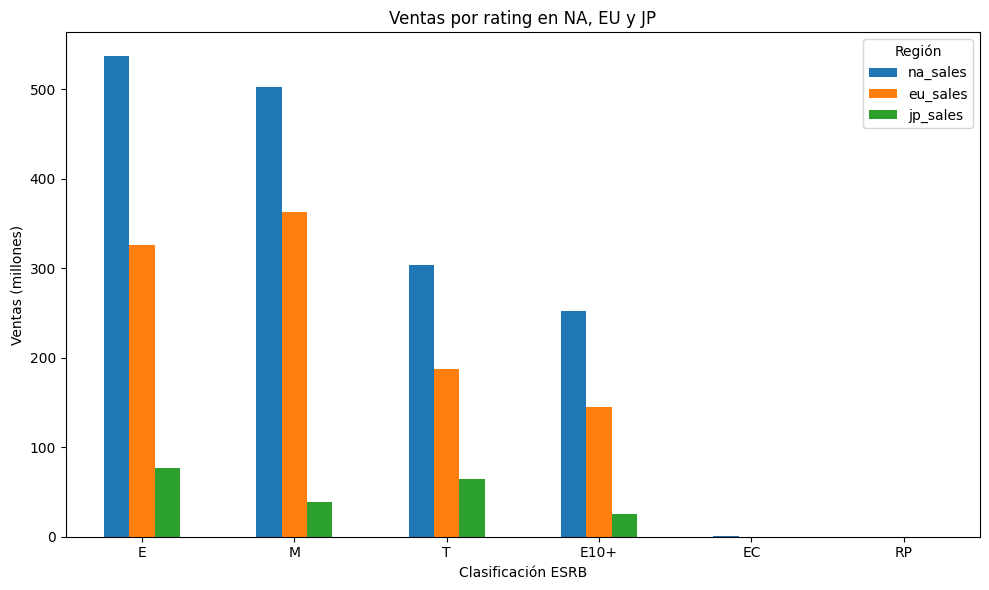

In [148]:
ventas_por_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por rating en NA, EU y JP')
plt.ylabel('Ventas (millones)')
plt.xlabel('Clasificación ESRB')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.tight_layout()
plt.show()


En cuanto a la calificación, vemos que la clasificación de juegos a los que se les debe tener presente son E:Everyone (Todos)
T: Teen (Adolescentes), M: Mature (Adultos).


## Prueba las siguientes hipótesis 

### Las medias de user_score son iguales para Xbox One y PC.


H0: media_XOne = media_PC: las medias son iguales
H1 (hipótesis alternativa): Las medias son diferentes.
media_XOne ≠ media_PC

In [149]:
# Filtramos datos relevantes
xone_scores = df_modelo[(df_modelo['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = df_modelo[(df_modelo['platform'] == 'PC')]['user_score'].dropna()


In [150]:
#H0: var_XOne = var_PC: las medias son iguales
#H1 (hipótesis alternativa): Las medias son diferentes.
#var_XOne ≠ var_PC

stat, p = levene(xone_scores, pc_scores )

print (p)

alpha = 0.05
if p < alpha:
    print("Se rechaza H₀: las varianzas son diferentes.")
else:
    print("No se rechaza H₀: las varianzas pueden considerarse iguales.")

0.09376382291518826
No se rechaza H₀: las varianzas pueden considerarse iguales.


In [151]:

# Prueba de t para muestras independientes (asumiendo varianzas iguales)
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var= True )

alpha = 0.05
print(f'El p-valor es: {p_value}')

if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre las medias del user_score entre Xbox One y PC.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de diferencia entre las medias del user_score entre Xbox One y PC.")

El p-valor es: 0.1295458611061516
No se puede rechazar la hipótesis nula: no hay evidencia suficiente de diferencia entre las medias del user_score entre Xbox One y PC.


<div class="alert alert-block alert-success">
<b>Celdas [149–151]</b> <a class="tocSkip"></a><br>
Muy buena implementación de la prueba de hipótesis para comparar los user_score de XOne y PC. Filtras correctamente los datos, aplicas la prueba de Levene para verificar igualdad de varianzas y luego usas `ttest_ind` con base en ese resultado. La interpretación del p-valor es clara y muestra comprensión de estadística inferencial.
</div>


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H₀ (nula):
Las calificaciones promedio de usuarios para los géneros Acción y Deportes son iguales.
media_Acción = media_Deportes

H₁ (alternativa):
Las calificaciones promedio de usuarios son diferentes entre ambos géneros.
media_Acción ≠ media_Deportes

In [152]:
# Filtramos datos
accion_scores = df_modelo[(df_modelo['genre'] == 'Action')]['user_score'].dropna()
sport_scores = df_modelo[(df_modelo['genre'] == 'Sports')]['user_score'].dropna()

In [153]:
#H0: var_action = var_sports: las medias son iguales
#H1 (hipótesis alternativa): Las medias son diferentes.
#var_action ≠ var_sports

stat, p = levene(accion_scores, sport_scores)

print (p)

alpha = 0.05
if p < alpha:
    print("Se rechaza H₀: las varianzas son diferentes.")
else:
    print("No se rechaza H₀: las varianzas pueden considerarse iguales.")


2.16218020353365e-09
Se rechaza H₀: las varianzas son diferentes.


In [154]:
# Prueba de t para muestras independientes (asumiendo varianzas diferentes)
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var= False)

alpha = 0.05
print(f'El p-valor es: {p_value}')

if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre las medias del user_score entre juegos de accion y deporte.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de diferencia entre las medias de los juegos de accion y deporte")

El p-valor es: 0.11111296036738474
No se puede rechazar la hipótesis nula: no hay evidencia suficiente de diferencia entre las medias de los juegos de accion y deporte


<div class="alert alert-block alert-success">
<b>Celdas [152–154]</b> <a class="tocSkip"></a><br>
Correctamente aplicas una segunda prueba de hipótesis para comparar géneros. Esta vez consideras varianzas diferentes, lo cual es una mejora con respecto al análisis anterior. Muy bien fundamentado el uso de pruebas estadísticas y bien explicada la conclusión, incluso si no se rechaza la hipótesis nula.
</div>


## Escribe una conclusión general

Para el modelo de proyección para el año 2017 podemos decir que
- Tener presente el mercado de NA que es el que genera más ganancias
- Nuevas consolas tiene ciclos de aproximadamente 8 años. Esto quiere decir que los juegos que se lancen en esos años deben ser los que sugiere el estudio: en mayor medida juegos de acción shooter y deportes son juegos de mayores ingresos. Es bueno tenerlo presente para un nuevo ciclo de juegos. Juegos del tipo role-play, pelea, platform deben considerarse como segundas opciones. 
- La calificación de los usuarios y de la crítica pueden tener poca influencia en la compra de consolas.
- De acuerdo a las hipótesis 6.1, si bien no podemos afirmar que las medias son iguales, los resultados sugieren que los usuarios puntúan de manera similar los juegos de Xbox One y PC (a los ususarios les gusta ambas consolas y posiblemente la calidad de los juegos de ambas consolas son iguales). Esto para el año 2017
- De acuerdo a las hipótesis 6.2, los jugadores valoran de forma comparable los juegos de acción y deporte (no se rechaza la hiótesis nula de igualdad), y esto puede indicar que la calificación de cada uno, no depende fuertemente del género analizado.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Diego! Este proyecto destaca por su enfoque metódico y profundo en cada etapa del análisis. Has demostrado dominio en la limpieza de datos, exploración visual, análisis segmentado por región y aplicación de pruebas estadísticas. Tus gráficos son claros, tus decisiones están bien justificadas y tus interpretaciones aportan valor estratégico.  

En general, tu entrega es sólida, profesional y muy bien argumentada. ¡Felicitaciones por este excelente resultado!
</div>
